In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [29]:
catcherData = pd.read_csv("CatcherData.csv")
teamData = pd.read_csv("Teams.csv")

In [30]:
catcherData.dtypes

Player           object
Team             object
Year              int64
Games             int64
Receiving         int64
Blocking          int64
Chances           int64
Advance att.      int64
Sum               int64
RRAA            float64
BRAA            float64
FRAA              int64
TRAA            float64
SumR            float64
dWAR            float64
w.Receiving     float64
w.Blocking      float64
w.Chances       float64
w.CS            float64
Runs/Game       float64
w.RRAA          float64
w.BRAA          float64
w.FRAA          float64
w.TRAA          float64
w.SumR          float64
w.dWAR          float64
sum d.WAR       float64
dtype: object

In [31]:
catcherData.sort_values('w.SumR', ascending = False)


,Player,Team,Year,Games,Receiving,Blocking,Chances,Advance att.,Sum,RRAA,...,w.Chances,w.CS,Runs/Game,w.RRAA,w.BRAA,w.FRAA,w.TRAA,w.SumR,w.dWAR,sum d.WAR
17,Buster Posey,SFG,2016,122,8968,4830,1071,129,14998,26.8,...,0.0714,0.0086,0.4426,16.0250,0.6441,1.840200,0.1571,18.67,3.19,11.11
79,Jonathan Lucroy,MIL,2013,122,9445,5168,921,186,15720,29.7,...,0.0586,0.0118,0.2361,17.8446,0.9863,-0.140800,-0.1113,18.58,3.35,NaN
78,Jonathan Lucroy,MIL,2014,120,10064,5235,1082,177,16558,22.1,...,0.0653,0.0107,0.3067,13.4324,1.6440,0.836400,-0.0980,15.81,2.90,NaN
53,Francisco Cervelli,PIT,2015,124,8749,4902,1081,228,14960,26.7,...,0.0723,0.0152,0.2484,15.6149,-0.4260,0.700000,-0.1879,15.70,2.79,NaN
164,Yasmani Grandal,LAD,2016,106,8308,4486,1082,171,14047,24.1,...,0.0770,0.0122,0.3575,14.2538,0.0958,1.159600,0.0385,15.55,2.66,6.14
16,Brian McCann,ATL,2012,113,8546,4592,898,171,14207,23.5,...,0.0632,0.0120,0.2319,14.1361,1.2929,-0.075245,-0.0190,15.33,2.69,NaN
21,Buster Posey,SFG,2012,111,8255,4476,932,188,13851,23.3,...,0.0673,0.0136,0.2468,13.8865,0.9048,0.000000,0.0875,14.88,2.61,NaN
84,Jose Molina,TBR,2012,80,6144,3214,702,124,10184,26.1,...,0.0689,0.0122,0.2863,15.7461,-0.8837,-0.081108,0.0414,14.82,2.60,NaN
125,Ryan Hanigan,CIN,2012,98,7403,3813,833,125,12174,21.1,...,0.0684,0.0103,0.3684,12.8309,1.0649,0.550846,0.3148,14.76,2.59,NaN
80,Jonathan Lucroy,MIL,2012,80,6910,4066,755,151,11882,22.9,...,0.0635,0.0127,0.3463,13.3175,0.9582,0.304999,-0.1271,14.45,2.54,NaN


In [32]:
catcherData.describe()

,Year,Games,Receiving,Blocking,Chances,Advance att.,Sum,RRAA,BRAA,FRAA,...,w.Chances,w.CS,Runs/Game,w.RRAA,w.BRAA,w.FRAA,w.TRAA,w.SumR,w.dWAR,sum d.WAR
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,66.000000
mean,2014.035928,93.125749,7179.449102,3965.802395,792.443114,141.041916,12078.736527,1.456287,0.191018,0.832335,...,0.065811,0.011786,0.030430,0.861627,0.063750,0.075237,0.017519,1.018443,0.180898,0.457727
std,1.422251,21.927641,1632.704843,911.335907,184.355295,35.020193,2732.753228,12.708908,2.127610,7.447529,...,0.005853,0.002088,0.195224,7.550733,0.701451,0.580465,0.121336,7.934464,1.412004,3.629546
min,2012.000000,41.000000,3563.000000,1921.000000,426.000000,51.000000,6006.000000,-24.400000,-10.900000,-16.000000,...,0.051300,0.006200,-0.415600,-14.447500,-3.672800,-1.211500,-0.406200,-15.710000,-2.880000,-6.660000
25%,2013.000000,76.500000,5919.000000,3261.000000,644.000000,117.000000,9950.500000,-8.000000,-1.050000,-4.000000,...,0.061900,0.010300,-0.101650,-4.789800,-0.344700,-0.326150,-0.044300,-4.460000,-0.790000,-1.697500
50%,2014.000000,95.000000,7299.000000,3996.000000,785.000000,139.000000,12226.000000,-0.700000,0.400000,0.000000,...,0.065800,0.011800,0.031300,-0.414700,0.129400,0.000000,0.014000,0.190000,0.030000,-0.035000
75%,2015.000000,111.000000,8333.000000,4640.000000,928.000000,165.500000,14028.000000,10.550000,1.600000,6.000000,...,0.069650,0.012850,0.154500,6.370600,0.541800,0.459850,0.082300,7.025000,1.255000,2.735000
max,2016.000000,142.000000,10730.000000,6114.000000,1175.000000,236.000000,18153.000000,29.700000,5.200000,23.000000,...,0.080800,0.018100,0.469400,17.844600,1.644000,1.840200,0.392600,18.670000,3.350000,11.110000


In [73]:
mergedData = pd.merge(catcherData, teamData, on = ['Team', 'Year'], how = 'inner')
list(mergedData)

['Player',
 'Team',
 'Year',
 'Games',
 'Receiving',
 'Blocking',
 'Chances',
 'Advance att.',
 'Sum',
 'RRAA',
 'BRAA',
 'FRAA',
 'TRAA',
 'SumR',
 'dWAR',
 'w.Receiving',
 'w.Blocking',
 'w.Chances',
 'w.CS',
 'Runs/Game',
 'w.RRAA',
 'w.BRAA',
 'w.FRAA',
 'w.TRAA',
 'w.SumR',
 'w.dWAR',
 'sum d.WAR',
 'lgID',
 'franchID',
 'divID',
 'Rank',
 'G',
 'Ghome',
 'W',
 'L',
 'DivWin',
 'WCWin',
 'LgWin',
 'WSWin',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'CS',
 'HBP',
 'SF',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'HA',
 'HRA',
 'BBA',
 'SOA',
 'E',
 'DP',
 'FP',
 'name',
 'park',
 'attendance',
 'BPF',
 'PPF',
 'teamIDBR',
 'teamIDlahman45',
 'teamIDretro']

y=0.038982802267766195x+-2.9862794081979143
0.307109548344
r-squared: 9.43%


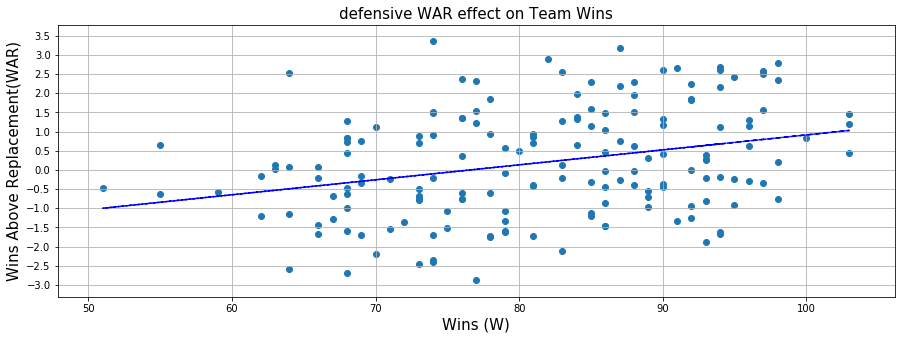

In [40]:
X = mergedData['W']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Wins (W)', size=15)
plt.ylabel('Wins Above Replacement(WAR)', size=15)
plt.title('defensive WAR effect on Team Wins', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.33317823676747704x+-25.61294800276125
0.291624801729
r-squared: 8.50%


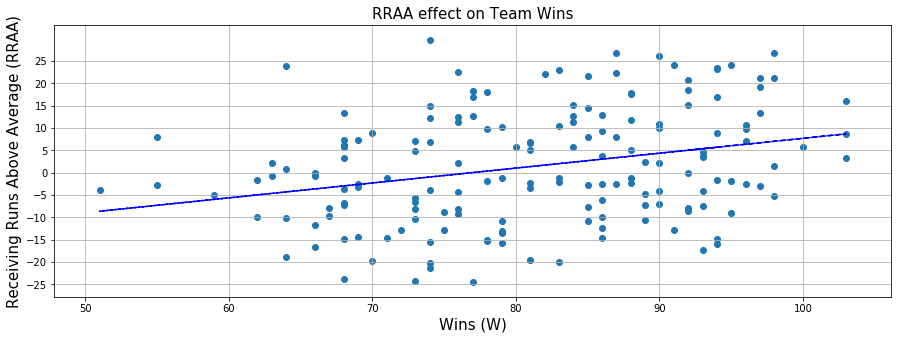

In [43]:
X = mergedData['W']
Y = mergedData['RRAA']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-30, 30, 5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Wins (W)', size=15)
plt.ylabel('Receiving Runs Above Average (RRAA)', size=15)
plt.title('RRAA effect on Team Wins', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-1.155420324113355x+4.721077395746502
-0.379970197451
r-squared: 14.44%


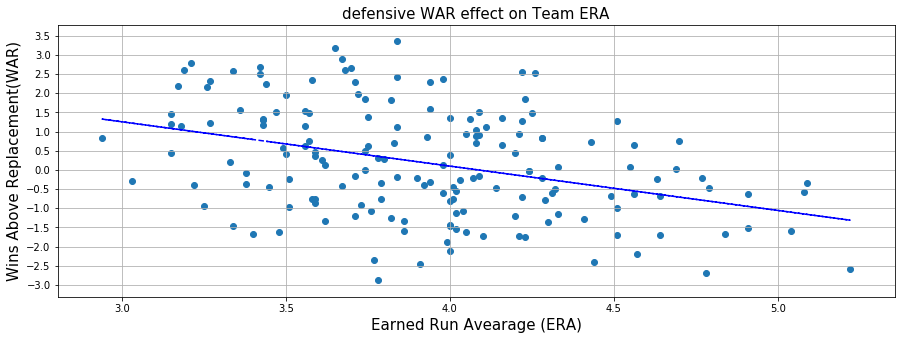

In [45]:
X = mergedData['ERA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 6, 0.5))
plt.xlabel('Earned Run Avearage (ERA)', size=15)
plt.ylabel('Wins Above Replacement(WAR)', size=15)
plt.title('defensive WAR effect on Team ERA', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.0050747494546366225x+-6.179525350901417
0.3629952513
r-squared: 13.18%


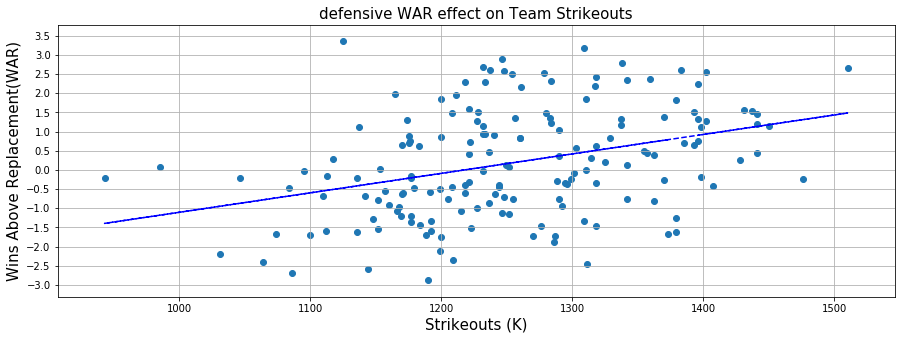

In [61]:
X = mergedData['SOA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 2000, 100))
plt.xlabel('Strikeouts (K)', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Strikeouts', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-0.008616473096291124x+4.356069577395054
-0.300827071644
r-squared: 9.05%


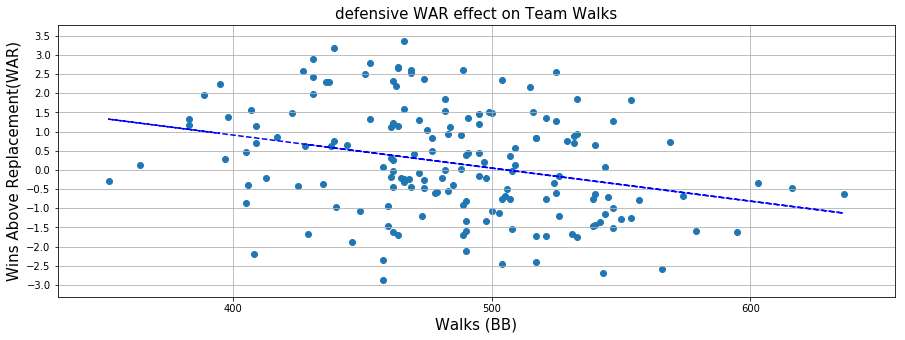

In [70]:
X = mergedData['BBA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 1500, 100))
plt.xlabel('Walks (BB)', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Walks', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-0.07440419996391902x+37.509354881917915
-0.288610679858
r-squared: 8.33%


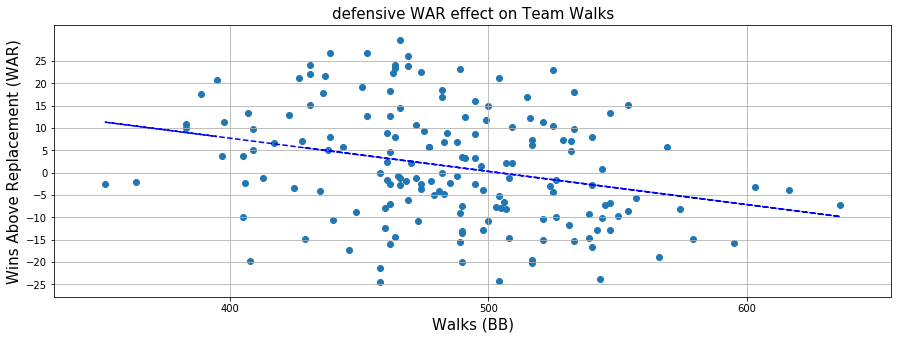

In [72]:
X = mergedData['BBA']
Y = mergedData['RRAA']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-30, 30, 5))
plt.xticks(np.arange(0, 1500, 100))
plt.xlabel('Walks (BB)', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Walks', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-0.005642147314352613x+8.046355627619691
-0.342213965011
r-squared: 11.71%


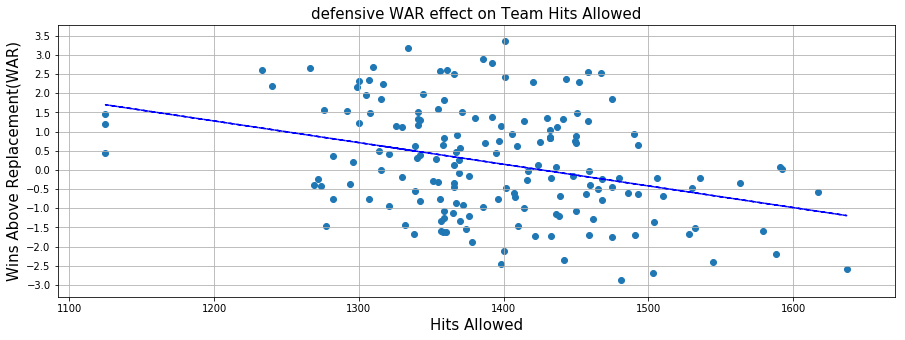

In [66]:
X = mergedData['HA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(1000, 2000, 100))
plt.xlabel('Hits Allowed', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Hits Allowed', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-0.009144506991962741x+1.6561207357513066
-0.165701475645
r-squared: 2.75%


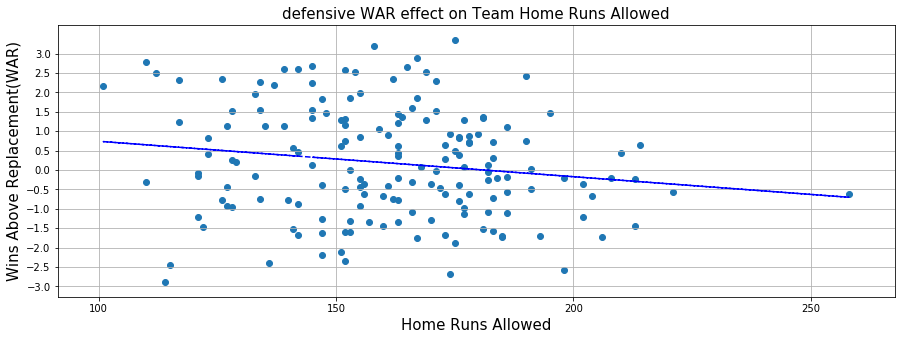

In [69]:
X = mergedData['HRA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-3.5, 3.5, 0.5))
plt.xticks(np.arange(100, 500, 50))
plt.xlabel('Home Runs Allowed', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Home Runs Allowed', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()